# Comparing Distributions with Quantile Plots
---
> Q-Q plots, visually comparing distributions, and visual test for normality

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# plt.style.available

In [3]:
plt.style.use(['seaborn-darkgrid',
#                'dark_background',
              ])
plt.rcParams['font.size']= 12

## Generate Data

In [4]:
np.random.seed(0) # set rng seed for reproducibility

X = { 'N(0,1)': np.random.normal(loc=0, scale=1.0, size=(100,)),
     'N(0,10)': np.random.normal(loc=0, scale=10.0, size=(150,)),
     'N(100,3)': np.random.normal(loc=100, scale=3.0, size=(100,)),
     'LogNorm(0,1)' : np.random.lognormal(mean=0.0, sigma=1.0, size=(100,)),
     'pareto(1)_1' : np.random.pareto(1, size=(100,)),
     'pareto(1)_2': np.random.pareto(1, size=(100,)),
    }

## Compute qunatiles using `np.quantile()`

`np.quantile` usage, e.g. estimating dataset median:

In [5]:
data_name = 'N(0,1)'
print(f'{data_name}; Median estimate:', np.quantile(X[data_name], 1/2)) # Median is 2-quantile

N(0,1); Median estimate: 0.09409611943799814


Compute quantiles for datasets:

In [6]:
p = np.linspace(0,1,100) # 1/q 
Qs = {k:np.quantile(X[k], p) for k in X} # quantiles

## Theoretical Quantiles for the Standard Normal Distribution

- Calculate theoretical quantiles with the *quantile function*, also called as percent point function (*ppf*) or *the inverse distribution function*. The *ppf* is the inverse of cumulative distribution function (*CDF*).
- The *ppf* for the standard normal distribution is called as the **probit function**.
- For CDF of a random variable $x$, $F(x) = p$, the ppf is $q=F^{-1}(p)$
- Use *ppf* of the standard normal distribution ($\mathcal{N}(0,1)$) to compute theoretical quantile values, and then compare them to the quantile of your sample data.

In [7]:
from scipy.stats import norm
# here 
q_theory = norm.ppf(p) # ppf for the standard normal dist

## Plot Histograms and Compare Data to the Normal Distribution

>References:
>- [Normal probability plot](https://itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)
>- [Probability plot](https://itl.nist.gov/div898/handbook/eda/section3/probplot.htm)
>- [Quantile-Quantile plot](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

\[*Histograms*\] --- \[*Quantiles*\] --- \[*Normal Probability Plots*\]
>Here we scale the standard normal distribution using data mean and standard deviation

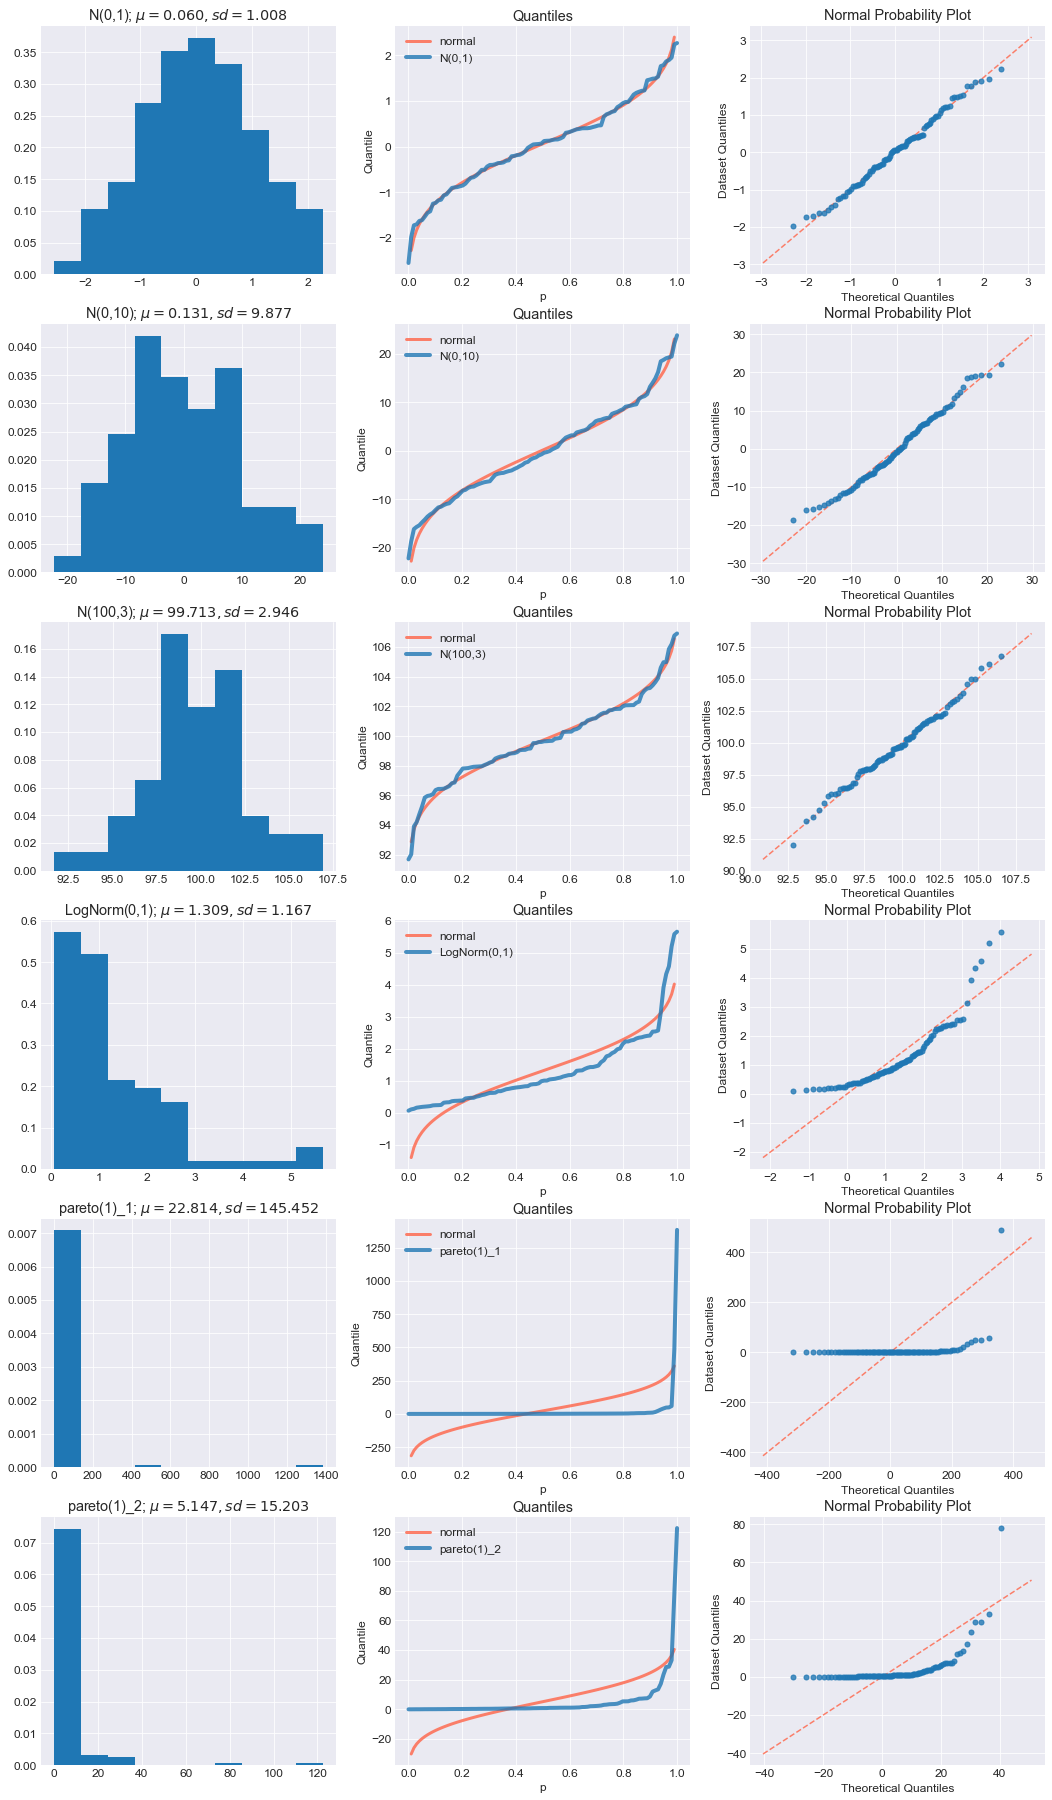

In [8]:
_,axs = plt.subplots(nrows=len(X), ncols=3, figsize=[18,5*len(X)+2])
for k,ax in zip(Qs, axs):
    # compute mean and standard deviation for a given distribution
    x_sd = X[k].std()
    x_mean = X[k].mean()
    
    # Draw histogram
    ax[0].hist(X[k], histtype='stepfilled', lw=4, density=True);
    ax[0].set_title(f'{k}; $\mu={x_mean:6.3f}, sd={x_sd:6.3f}$')
    
    #  Quantiles
    # scaled PROBIT FUNCTION values: use mean and sd to scale standard normal distribution
    line_45 = [x_mean-3*x_sd,x_mean+3*x_sd]
    ax[1].plot(p, q_theory*x_sd+x_mean,'-',c='tomato', lw=3, alpha=.8, label='normal')
    # data quantiles:
    ax[1].plot(p, Qs[k], label=f'{k}', lw=4, alpha=.8)
    
    ax[1].set_xlabel('p')
    ax[1].set_ylabel('Quantile')
    ax[1].legend();
    ax[1].set_title('Quantiles')
    
    # Normal Probability Plot
    # scales 45-degree line
    ax[2].plot(line_45, line_45,'--',c='tomato',alpha=.8)
    # qq-plot
    ax[2].plot(q_theory*x_sd+x_mean, Qs[k],'o',ms=5, alpha=.8)
    ax[2].set_xlabel('Theoretical Quantiles')
    ax[2].set_ylabel('Dataset Quantiles')
    ax[2].set_title('Normal Probability Plot')
plt.show()

- Compare these with the q-q plot from `statsmodels` (technically these are *normal probability plots*)
- Q-Q plots are use to compare to sets of sample data, e.g. x1 vs x2, when one of them are theoretical quantiles the plot is called probability plot.

In [9]:
from statsmodels.graphics.gofplots import qqplot

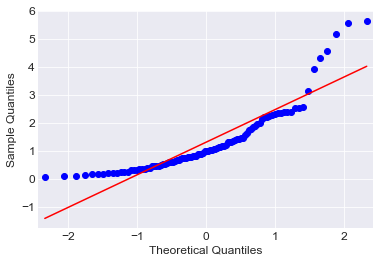

In [10]:
qqplot(X['LogNorm(0,1)'], line='s')  # also try line='45'
plt.show();

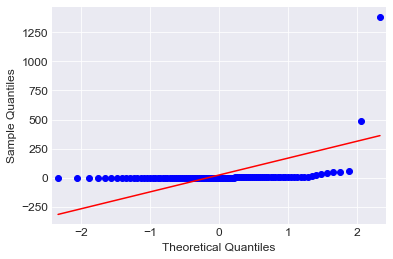

In [11]:
qqplot(X['pareto(1)_1'], line='s') # also try line='45'
plt.show();

## Comparing Data against Other Theoretical Distributions

*See help for probability plot ([`scipy.stats.probplot`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) )*